# <center>CITS4012 Project 1 A rule based chatbot</center>
**Name: Jialing Liu**<br>
**Student Number: 23125467**<br>

##  Introduction
In this project we will create a rule based chatbot based on the seek_australia.csv job dataset obtained from data.world. Users can communicate with the chatbot via telegram. The chatbot can handle specific messages from users who seek for jobs. 

## 1 Data Exploration


In [1]:
import pandas as pd
# read data into a dataframe
data = pd.read_csv('seek_australia.csv', sep=',')


In [2]:
data.shape

(3000, 12)

In [5]:
type(data['job_description'])

pandas.core.series.Series

In [3]:
data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


In [5]:
# unique number of cities in the dataset
len(list(data['city'].value_counts()))

60

In [4]:
print(len(data['city'].unique()))

60


In [ ]:
# find unique job categories for each city
group_city = data.groupby('city')
df = group_city.apply(lambda x: x['category'].unique())
df.to_frame().reset_index()

,city,0
0,ACT,"[Real Estate & Property, Administration & Offi..."
1,Adelaide,"[Trades & Services, Retail & Consumer Products..."
2,Adelaide Hills & Barossa,"[Farming, Animals & Conservation, Trades & Ser..."
3,Albany & Great Southern,"[Healthcare & Medical, Community Services & De..."
4,Albury Wodonga & Murray,"[Construction, Administration & Office Support..."
...,...,...
60,Wagga Wagga & Riverina,"[Community Services & Development, Healthcare ..."
61,Whyalla & Eyre Peninsula,"[Call Centre & Customer Service, Community Ser..."
62,"Wollongong, Illawarra & South Coast","[Trades & Services, Engineering, Hospitality &..."
63,Yarra Valley & High Country,"[Community Services & Development, Trades & Se..."


{'Trades & Services': 30, 'Government & Defence': 27, 'Healthcare & Medical': 22, 'Mining, Resources & Energy': 16, 'Information & Communication Technology': 14, 'Construction': 13, 'Retail & Consumer Products': 10, 'Manufacturing, Transport & Logistics': 10, 'Banking & Financial Services': 9, 'Human Resources & Recruitment': 9, 'Accounting': 8, 'Administration & Office Support': 8, 'Engineering': 8, 'Education & Training': 7, 'Sales': 7, 'Hospitality & Tourism': 6, 'Real Estate & Property': 5, 'Marketing & Communications': 3, 'Insurance & Superannuation': 3, 'Community Services & Development': 3, 'Call Centre & Customer Service': 3, 'Legal': 2, 'Sport & Recreation': 2, 'CEO & General Management': 2, 'Design & Architecture': 1, 'Farming, Animals & Conservation': 1, 'Science & Technology': 1}


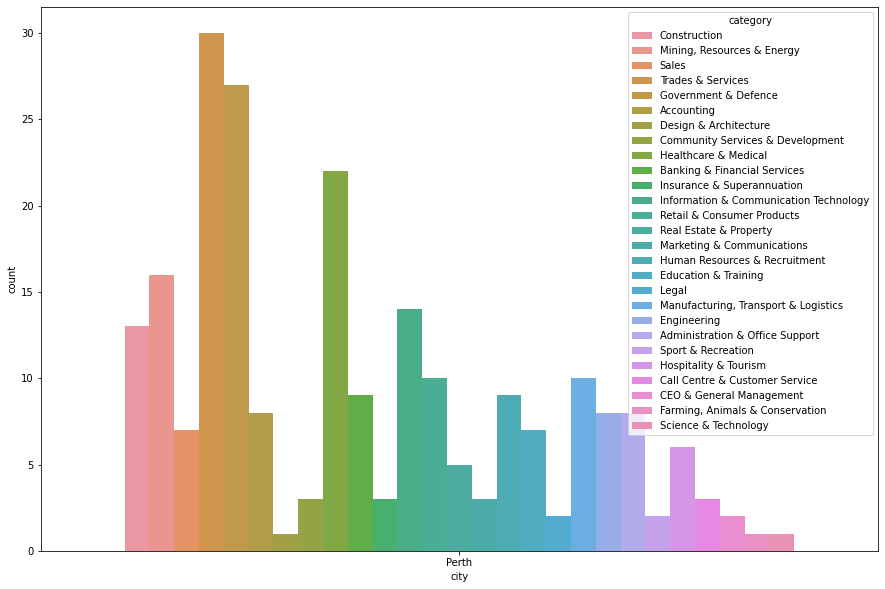

In [6]:
# Data exploration task1
# visualise the frequency of job categories
from matplotlib import pyplot as plt
import seaborn as sns
# create a function that get the frequency of job categories for each city and visualise it
def get_category_freq(city):
    d=data[data['city']==city]
    categories_dict=d['category'].value_counts().to_dict()
    print(categories_dict)
    plt.figure(figsize=(15,10))
    ax = sns.countplot(x="city", hue="category", data=d)
# Example: get the frequency of job categories of Perth
get_category_freq('Perth')

In [ ]:
# Data Exploration task2
# extract all job descriptions for each job catetory as text, apply gensim to tokinize text to words, 
import gensim
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

In [10]:
# group job descriptions for each job category {'category': [list of job descriptions]}
categories = list(data['category'].unique())
#categories
# create a dict, key is job category, value is a list of job descriptions for that job category
dict_jobs = {}
for category in categories:
    dict_jobs[category]=list(data[data['category']==category]['job_description'].astype(str))

In [ ]:
# concatenate each job description as a whole string for each job category, and store in a list
jd_list=[''.join(dict_jobs[category]) for category in categories]
#len(jd_list)

30

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

In [ ]:
# create a function that output the vacobulary used by  job category and word frequency
def get_vocabulary_freq(job_category):
    doc_tokenized = list(sent_to_words(jd_list))
    dictionary = Dictionary()
    BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized if len(doc) >1]
    BoW_corpus
    index = categories.index(job_category)
    return (sorted(([[dictionary[id], freq] for id, freq in BoW_corpus[index]]),key=lambda x:x[1], reverse=True))


From above function we can get all vocabulary used in the job descriptions by the job category in the categories list, and word frequency for that job category. The following is an example for job category of Legal.


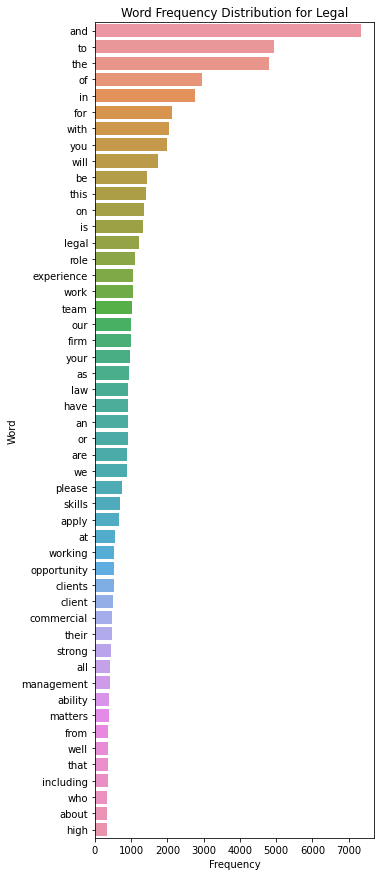

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
vocab_list=get_vocabulary_freq('Legal')
plot = pd.DataFrame(vocab_list[:50], columns=['Word', 'Frequency'])
fig, ax = plt.subplots(figsize=(5,15))
bar_plot = sns.barplot(x=plot.Frequency, y=plot.Word, orient='h', ax=ax)
plt.title('Word Frequency Distribution for Legal')
plt.show()

In [8]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## 2 Data Preprocessing




### 2.1 Tokenization

First we group job descriptions for each category as a corpus, and each job description is a document. Then we use NLTK to perform tokenization on job descriptions.

In [9]:
import nltk
tokenized_jd={}
for job_category, job_corpus in dict_jobs.items():
    tokenized_jd[job_category]=[]
    for doc in job_corpus:
        words = nltk.word_tokenize(doc.lower())
        tokenized_jd[job_category].extend(words)


In [10]:
# vocabulary size after tokenization
for job_category, tokenized_words in tokenized_jd.items():
    vocab_size = len(set(tokenized_words))
    print(f'The vocabulary size for job category {job_category} is {vocab_size}.')

The vocabulary size for job category Retail & Consumer Products is 3426.
The vocabulary size for job category Government & Defence is 4682.
The vocabulary size for job category Trades & Services is 7021.
The vocabulary size for job category Manufacturing, Transport & Logistics is 5367.
The vocabulary size for job category Sales is 4751.
The vocabulary size for job category Community Services & Development is 3475.
The vocabulary size for job category Healthcare & Medical is 6678.
The vocabulary size for job category Information & Communication Technology is 7385.
The vocabulary size for job category Mining, Resources & Energy is 2980.
The vocabulary size for job category Construction is 3860.
The vocabulary size for job category Design & Architecture is 1884.
The vocabulary size for job category Call Centre & Customer Service is 3087.
The vocabulary size for job category Marketing & Communications is 3924.
The vocabulary size for job category Administration & Office Support is 5332.
Th

### 2.2 Lemmatization and Stemming

Next, we perform lemmatization and stemming on the tokenized words.

In [11]:
from nltk.stem import WordNetLemmatizer
# lemmatization
lem = WordNetLemmatizer()
lemmatized_jd = {}
for job_category, tokenized_words in tokenized_jd.items():
    lemmatized_jd[job_category]=[]
    for w in tokenized_words:
        rootword = lem.lemmatize(w)
        lemmatized_jd[job_category].append(rootword)


In [12]:
# vocabulary size after lemmatization
for job_category, lemmatized_words in lemmatized_jd.items():
    vocab_size = len(set(lemmatized_words))
    print(f'The vocabulary size for job category {job_category} is {vocab_size}.')

The vocabulary size for job category Retail & Consumer Products is 3162.
The vocabulary size for job category Government & Defence is 4290.
The vocabulary size for job category Trades & Services is 6417.
The vocabulary size for job category Manufacturing, Transport & Logistics is 4930.
The vocabulary size for job category Sales is 4330.
The vocabulary size for job category Community Services & Development is 3193.
The vocabulary size for job category Healthcare & Medical is 6171.
The vocabulary size for job category Information & Communication Technology is 6776.
The vocabulary size for job category Mining, Resources & Energy is 2733.
The vocabulary size for job category Construction is 3532.
The vocabulary size for job category Design & Architecture is 1752.
The vocabulary size for job category Call Centre & Customer Service is 2849.
The vocabulary size for job category Marketing & Communications is 3561.
The vocabulary size for job category Administration & Office Support is 4849.
Th

In [13]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stem_jd = {}
for job_category, tokenized_words in tokenized_jd.items():
    stem_jd[job_category]=[]
    for w in tokenized_words:
        rootword = ps.stem(w)
        stem_jd[job_category].append(rootword)


In [14]:
# vocabulary size after stemming
for job_category, stem_words in stem_jd.items():
    vocab_size = len(set(stem_words))
    print(f'The vocabulary size for job category {job_category} is {vocab_size}.')

The vocabulary size for job category Retail & Consumer Products is 2619.
The vocabulary size for job category Government & Defence is 3515.
The vocabulary size for job category Trades & Services is 5365.
The vocabulary size for job category Manufacturing, Transport & Logistics is 4101.
The vocabulary size for job category Sales is 3506.
The vocabulary size for job category Community Services & Development is 2618.
The vocabulary size for job category Healthcare & Medical is 5200.
The vocabulary size for job category Information & Communication Technology is 5591.
The vocabulary size for job category Mining, Resources & Energy is 2289.
The vocabulary size for job category Construction is 2920.
The vocabulary size for job category Design & Architecture is 1491.
The vocabulary size for job category Call Centre & Customer Service is 2345.
The vocabulary size for job category Marketing & Communications is 2878.
The vocabulary size for job category Administration & Office Support is 3994.
Th

Comparing the results of vocabulary size obtained from the two deffierent operations lemmatisation and stemming, we find that vocabulary size for each job category after stemming is smalller than after lemmatisation.

### 2.3 Retokenize

Next, we will use spaCy to retokenize frequent noun phrases.

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

# get retoken text for each job category
def get_retoken_text(job_category):
    job_corpus = dict_jobs[job_category] 
    retoken_text_category = []   
    for jd in job_corpus:
        # create a doc for each job description
        jd_doc = nlp(jd.lower())
        with jd_doc.retokenize() as retokenizer:
            for chunk in jd_doc.noun_chunks:
                retokenizer.merge(chunk)
        retoken_text_jd = [retoken.text for retoken in jd_doc]
        # create a list of lists store retokenized text of each job description
        retoken_text_category.append(retoken_text_jd)
    return retoken_text_category
#print(get_retoken_text('Government & Defence'))        

In [16]:
# retokenize each job description for each job category, store all retoken text of all categories in a dict
retoken_jd = {}
retoken_vocab_size ={}
retoken_words_ca={}
for job_category in dict_jobs.keys():
    retoken_text_ca = get_retoken_text(job_category)
    retoken_jd[job_category] = retoken_text_ca
    retoken_words_ca[job_category] =[]
    for jd in retoken_text_ca:
        retoken_words_ca[job_category].extend(jd)
    retoken_vocab_size[job_category]=len(set(retoken_words_ca[job_category]))
print(retoken_vocab_size) 

#retoken= retoken_jd['Government & Defence'] 
#for list in retoken:
    #words_list = [words for words in list] 
#print(len(words_list))

{'Retail & Consumer Products': 5029, 'Government & Defence': 7147, 'Trades & Services': 12966, 'Manufacturing, Transport & Logistics': 9116, 'Sales': 7977, 'Community Services & Development': 5308, 'Healthcare & Medical': 12010, 'Information & Communication Technology': 14613, 'Mining, Resources & Energy': 4073, 'Construction': 5868, 'Design & Architecture': 2116, 'Call Centre & Customer Service': 4335, 'Marketing & Communications': 6201, 'Administration & Office Support': 9314, 'Banking & Financial Services': 4156, 'Engineering': 4666, 'Education & Training': 6870, 'Accounting': 7902, 'Human Resources & Recruitment': 5216, 'Real Estate & Property': 4085, 'Sport & Recreation': 1361, 'Legal': 2856, 'Hospitality & Tourism': 5779, 'Consulting & Strategy': 1161, 'Farming, Animals & Conservation': 1101, 'Advertising, Arts & Media': 1383, 'Insurance & Superannuation': 1838, 'Self Employment': 171, 'CEO & General Management': 944, 'Science & Technology': 1199}


### 2.4 Remove stop words

Remove stop words (rank words according to TF/IDF). TF-IDF of a word represents how important the word is in the document, the higher TF-IDF score, the more important the word in that document. The lower the IDF value of a word, the less unique it is to any particular document. So we can consider words with lowest TF-IDF values as stop words. Here we consider words with top 10 lowest TFIDF values as stop words.

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
# create a stop words list for each category
def stop_words_list(category):
    jd_docs=dict_jobs[category]
    pipe_jd = Pipeline([('count', CountVectorizer()), ('tfidf', TfidfTransformer())]).fit(jd_docs)

    idf_jd = pipe_jd['tfidf'].idf_.tolist()
    feature_names= pipe_jd['count'].get_feature_names_out().tolist()
    
    ordered_idf, ordered_words = zip(*sorted((zip(idf_jd, feature_names))))
    sw_list= ordered_words[:30]
    return sw_list
sw=[]
#for category in dict_jobs.keys():
    #sw_category = stop_words_list(category)
    #sw.extend(sw_category)

In [43]:
print(stop_words_list('Engineering'))

('and', 'to', 'in', 'the', 'for', 'of', 'with', 'experience', 'on', 'be', 'will', 'is', 'you', 'this', 'are', 'or', 'an', 'role', 'engineering', 'team', 'work', 'have', 'your', 'as', 'skills', 'projects', 'our', 'please', 'apply', 'that')


In [17]:

rm_sw_jd ={}
rm_sw_vocab = {}
for category, retoken_text in retoken_jd.items():
    rm_sw_jd[category]=[]
    sw_category = stop_words_list(category)
    for jd in retoken_text:
        jd_rm_stop = [token for token in jd if token not in sw_category]
        rm_sw_jd[category].extend(jd_rm_stop)
    rm_sw_vocab[category]=len(set(rm_sw_jd[category]))
print(rm_sw_vocab)   
    


{'Retail & Consumer Products': 5019, 'Government & Defence': 7137, 'Trades & Services': 12956, 'Manufacturing, Transport & Logistics': 9106, 'Sales': 7967, 'Community Services & Development': 5298, 'Healthcare & Medical': 12000, 'Information & Communication Technology': 14603, 'Mining, Resources & Energy': 4063, 'Construction': 5858, 'Design & Architecture': 2106, 'Call Centre & Customer Service': 4325, 'Marketing & Communications': 6191, 'Administration & Office Support': 9304, 'Banking & Financial Services': 4146, 'Engineering': 4656, 'Education & Training': 6860, 'Accounting': 7892, 'Human Resources & Recruitment': 5206, 'Real Estate & Property': 4075, 'Sport & Recreation': 1351, 'Legal': 2846, 'Hospitality & Tourism': 5769, 'Consulting & Strategy': 1151, 'Farming, Animals & Conservation': 1091, 'Advertising, Arts & Media': 1373, 'Insurance & Superannuation': 1828, 'Self Employment': 164, 'CEO & General Management': 934, 'Science & Technology': 1190}


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 



In [ ]:
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True, stop_words='english') 
docs=dict_jobs['Engineering']
# just send in all your docs here 
tfidf=tfidf_vectorizer.fit_transform(docs)
# get the first vector out (for the first document) 
pd.DataFrame(tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names())
# place tf-idf values in a pandas data frame 
first_vector_tfidfvectorizer=tfidf[0]
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)[:100]

In [7]:
# this function is used to help calculate tfidf with retokenizerd text
def dummy_tokenizer(docs):
    return docs

In [108]:
# Data Preprocessing task5
# get noun phrase, create a list of area of eaperience for a job category
def get_np(job_category):
    job_corpus = dict_jobs[job_category] 
    retoken_np_category = []   
    for jd in job_corpus:
        retoken_np_jd=[]
        # create a doc for each job description
        jd_doc = nlp(jd.lower())
        for sent in jd_doc.sents:
            if "experience" in sent.text:
                for chunk in sent.noun_chunks:
                    if "experience" in chunk.text and chunk.root.dep_=='obdj'and chunk.text !='experience':
                        retoken_np_jd.append(chunk.text)
                    # for pattern e.g. experience in/with mechanical engineering
                    if chunk.root.dep_=='pobj' and chunk.root.head.head.lemma_=='experience' and chunk.root.head.head.pos_=='NOUN':
                        retoken_np_jd.append(chunk.text)
        #retoken_np_jd = [chunk.text for chunk in jd_doc.noun_chunks]
        # create a list of lists store retokenized text of each job description
        retoken_np_category.append(retoken_np_jd)
    #return retoken_np_category
    tfidf_vectorize = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_tokenizer,
    preprocessor=dummy_tokenizer,
    token_pattern=None, stop_words='english')  
    tfidf=tfidf_vectorize.fit_transform(retoken_np_category)
    experience_list=[]
    for jd_tfidf in tfidf:
        doc_tfidf=jd_tfidf.toarray().tolist()
        feature_names=tfidf_vectorize.get_feature_names_out().tolist()
        ordered_tfidf, ordered_words = zip(*sorted((zip(doc_tfidf[0], feature_names)), reverse=True))

        #d[d.index.str.contains('experience', case=False)].indexif 'experience'in np]
        jd_experience=[np for np in ordered_words[:200]] 
        experience_list.append(set(jd_experience))
        #experience_list.extend(jd_experience)
    res = set.intersection(*experience_list)
    return res
    #return list(set(experience_list))
    #tfidf.vocabulary_


In [109]:
# an example: noun phrases of area of experience for category Government & Defence
en_list=get_np('Government & Defence')
print(len(en_list))
print(en_list)

194
{'provision', 'our diverse range', 'relation', 'the communications environment', 'sound knowledge', 'research', 'the supervision', 'the hris field', 'the legal system', 'rollingstock maintenance', 'senior leadership roles', 'the financial services and superannuation industry', 'the preparation', 'the critical care environment', 'the human synergistics culture and leadership inventory tools', 'the field', 'parking enforcement', 'the scoping', 'vendor operations management', 'the areas', 'mental health', 'the tourism industry', 'the oversight', 'sales', 'regard', 'project', 'overhead wiring', 'the aps', 'negotiation', 'the operations', 'people management', 'the broadcasting industry', 'senior marketing', 'planning and associated legislation', 'the following key selection criteria', 'the planning field', 'media', 'traffic engineering', 'the delivery', 'stakeholder engagement', 'maximo desirable utilities', 'the interpretation', 'proven planning', 'policy writing', 'the boundaries', 'r

In [90]:
# create a funtion to get all named entities such as company names for each job category
def get_ne(job_category):
    location_list=[]
    job_corpus = dict_jobs[job_category] 
    retoken_org_category = []   
    #retoken_np_category = []   
    for jd in job_corpus:
        # create a doc for each job description
        jd_doc = nlp(jd)
        #with jd_doc.retokenize() as retokenizer:
            #for chunk in jd_doc.noun_chunks:
                #retokenizer.merge(chunk)
        retoken_org_jd = [entity.text for entity in jd_doc.ents if entity.label_=='GPE']
        # create a list of lists store retokenized text of each job description
        retoken_org_category.append(retoken_org_jd)
    #return retoken_np_category
    tfidf_vectorize = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_tokenizer,
    preprocessor=dummy_tokenizer,
    token_pattern=None, stop_words='english')  
    tfidf=tfidf_vectorize.fit_transform(retoken_org_category)
    company_list=[]
    for jd_tfidf in tfidf:
        doc_tfidf=jd_tfidf.toarray().tolist()
        feature_names=tfidf_vectorize.get_feature_names_out().tolist()
        ordered_tfidf, ordered_words = zip(*sorted((zip(doc_tfidf[0], feature_names)), reverse=True))

        #d[d.index.str.contains('experience', case=False)].index
        
        company_list.extend(ordered_words[:50])
    return set(company_list)
   

In [91]:
# an example that output the locations mentioned in the job category Engineering
ne=get_ne('Engineering')
print(ne)

{'Papua New Guinea', 'Silverwater', 'Brazil', 'Warwick', 'Victoria', 'Strong', 'Newcastle', 'Kristine.McCormack@jbssa.com.au', 'aÂ', 'Us', 'Perth', 'North Sydney', 'exp.', 'St Leonards', 'Canada', 'Sydney', 'DC', 'Mackay', 'New South Wales', 'HSES', 'Understand', 'Notting Hill', 'North Queensland', 'SAP', 'Revit Past', 'Lubrizol', 'Laing', 'Australia', 'New Zealand', 'Auckland', 'Brisbane', 'Peru', 'WA', 'PLC', 'theirÂ', 'theÂ', 'SCADA', 'Kaftan', 'Maintenance', 'Revit', 'Melbourne', 'Brooklyn Plant', 'Shepparton', 'Cardno', 'MD', 'Linkedin'}


C:\Users\jialingliu\.conda\envs\cits4012\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


As we can see the output named entities of location in job category of Engineering, some locations are not in Australia such as 'Canada','Peru', and some words are not locations such as 'Linkedin','Maintenance'. The results extracted form the job descriptions look like not very useful. So we considered to use the structured information of locations in the dataset.

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [111]:
ent_dic={}
for category in dict_jobs.keys():
    ent_dic[category]={}
    ent_dic[category]["experience"]=get_np(category)
    ent_dic[category]["job names"]= list(set(data[data["category"]==category]['job_title']))
    ent_dic[category]['location']= list(set(data[data["category"]==category]['city']))
    ent_dic[category]['company'] = list(set(data[data["category"]==category]['company_name']))

In [149]:
# create a function, parse each job description, and extract experience information
def parse_jd(data):
    exper_info=[]
    jd_data=data['job_description']
    category=data['category']
    for i in range(30000):
        jd_info=[]
        jd=str(jd_data[i])
        doc=nlp(jd)
        for sent in doc.sents:
            for i in range(len(sent)):
                if sent[i].lemma_=='experience' and sent[i].pos_=='NOUN':
                    for chunk in sent[i:].noun_chunks:
                        if chunk.root.dep_=='pobj' and chunk.root.head.head.lemma_=='experience':
                            jd_info.append(chunk.text)
        exper_info.append(list(set(jd_info)))
    return exper_info


In [151]:
# extract the experience information of each job description
exper_info = parse_jd(data)

We store the data after processing in a new dataset new_data.

In [ ]:
new_data=data[['category', 'city', 'company_name', 'job_description', 'job_title', 'job_type', 'salary_offered', 'state','url']]
new_data['experience_info']=exper_info


In [ ]:
new_data["job_title"]=new_data["job_title"].str.lower()
new_data["category"]=new_data["category"].str.lower()
new_data["job_type"]=new_data["job_type"].str.lower()


In [212]:
# new dataset
new_data.head()

,category,city,company_name,job_description,job_title,job_type,salary_offered,state,url,experience_info
0,retail & consumer products,Sydney,Frontline Executive Retail Sydney,Have you had 10 years experience in fresh pro...,store manager - fresh produce,full time,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382,"[fresh produce, our customers]"
1,government & defence,Brisbane,Powerlink,The Opportunity: The Client Solution Analyst ...,client solution analyst,full time,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272,[ITSM approach]
2,trades & services,Sydney,Richard Jay Laundry,An innovative business development role for a...,service technician / installer - nsw,full time,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270,"[a related field, a similar role]"
3,trades & services,Melbourne,Adaptalift Hyster,About the role: We are seeking an Automotive W...,workshop technician i material handling equipment,full time,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203,[]
4,trades & services,Adelaide,Bakers Delight G&M,Â Early starts and weekend shifts. No experie...,apprenticeship junior baker,full time,NaN,NaN,https://www.seek.com.au/job/35991578,[]


## 3 Linguistic Patterns 

### 3.1 Patterns for job name

In [461]:
from spacy.matcher import Matcher
job_synonyms=['job', 'work','position']
# this list is for removing matches such as a full time job
job_type_list=['full time', 'part time', 'casual']
# pattern for job name, job category
# pattern 1: NOUN+job(e.g. I want to find a engineering job)
name_pattern1 =[{"POS": "NOUN"}, {"LEMMA": {"IN": job_synonyms}}]

def category_pattern1(sent):
    name=[]
    matcher = Matcher(nlp.vocab)
    matcher.add("job_name", [name_pattern1])
    matches = matcher(nlp(sent), as_spans=True)
    for span in matches:
        for i in range(len(span)):
            if span[i].text in job_synonyms:
                name.append(span[:i].text)
    return name

In [463]:
# example for category_pattern1
text_cp1="I'm looking for a construction work"
category_pattern1(text_cp1)

['construction']

In [553]:
p2=nlp("I'm looking for a job in construction")
for chunk in p2.noun_chunks:
    print(chunk.text, chunk.root.head.text)
displacy.render(p2, style='dep')

I looking
a job for
construction in


In [447]:
# design pattern using dependency trees
# ['job', 'work','position']+prep+pobj (e.g. I'm looking for a job in construction)
def category_pattern2(sent):
    doc=nlp(sent)
    matches=[]
    for chunk in doc.noun_chunks:
        if chunk.root.dep_=='pobj'and chunk.root.head.dep_=='prep' and chunk.root.head.head.lemma_ in job_synonyms:
            if len(chunk.ents)==0:
                matches.append(chunk.text)
    return matches

                

            

In [448]:
# example for category_pattern2
text_cp2="I'm looking for a job in construction"
category_pattern2(text_cp2)

['construction']

### 3.2 Patterns for location

In [195]:
# pattern for location
# pattern1: in + GPE (e.g. find me a job in Sydney)
l_pattern1 = [{"LOWER": "in"}, {"ENT_TYPE": "GPE", "OP":"+"}]
# pattern2: near + GPE (e.g. find me a job near/around Perth)
l_pattern2 = [{"LOWER": {"IN":["near","around"]}}, {"ENT_TYPE": "GPE", "OP":"+"}]
def loc_pattern(sent):
    matcher = Matcher(nlp.vocab)
    matcher.add("location", [l_pattern1, l_pattern2])
    matches = matcher(nlp(sent), as_spans=True)
    return matches


In [465]:
# example1
loc_p1="find me a job in Sydney"
loc_pattern(loc_p1)

[in Sydney]

In [466]:
#example2
loc_p2='find me a job around Perth'
loc_pattern(loc_p2)

[around Perth]

### 3.3 Patterns for company name

In [297]:
# pattern for company name
# pattern1: at + ORG (e.g. I'd like to work at Woolworth, find me a job.)
company_pattern1 = [{"LOWER": "at"}, {"ENT_TYPE": "ORG", "OP":"+"}]
# pattern2: a + ORG + job (e.g. I'd like to apply for a Coles job.)
company_pattern2 = [{"LOWER": "a"}, {"ENT_TYPE": "ORG", "OP":"+"}, {"LOWER": "job"}]
def com_pattern(sent):
    matcher = Matcher(nlp.vocab)
    matcher.add("company", [company_pattern1,company_pattern2])
    matches = matcher(nlp(sent), as_spans=True)
    return matches



In [557]:
#example1
com_p1="I'd like to work at McDonald, find me a job."
m=com_pattern(com_p1)
print(m)
for s in m:
    for ent in s.ents:
        print(ent.text, ent.label_)

[at McDonald]
McDonald ORG


In [558]:
#example2
com_p2="I'd like to apply for a Google job"
com_pattern(com_p2)

[a Google job]

### 3.4 Patterns for job type

In [334]:
# case1 part time job is a direct object of the verb find
t1=nlp("find me a part time job")
displacy.render(t1, style='dep')

In [343]:
# case2 part time job is the object of a preposition 'for'
t2=nlp("I'm available for part time work ")
displacy.render(t2, style='dep')

In [482]:
#job type pattern1 [full time, part time, casual] + pobj/dobj
type_list=['full time', 'part time', 'casual']
def type_pattern1(sent):
    matches=[]
    doc=nlp(sent)
    for chunk in doc.noun_chunks:
        if chunk.root.dep_=='pobj' or chunk.root.dep_=='dobj':
            matches.extend([ t for t in type_list if t in chunk.text.lower()])
    return matches

In [559]:
#example1
type_p1="I'm available for part time work"
type_pattern1(type_p1)

['part time']

In [560]:
#example2
type_p2="find me a part time job"
type_pattern1(type_p2)

['part time']

In [563]:
# job type pattern2 case1
tp2_c1=nlp("I want to work full time.")
displacy.render(tp2_c1, style='dep')

I


In [375]:
# job type pattern2 case2
tp2_c2=nlp("I'like to work casual.")    
displacy.render(tp2_c2, style='dep')

In [487]:
# job type pattern2 VERB+[fulltime, part time, casual]
def type_pattern2(sent):
    matches =[]
    doc=nlp(sent)
    for i in range(len(doc)):
        if doc[i].pos_ == 'VERB' and doc[i].text=='work':
            matches.extend([t for t in type_list if t in doc[i:].text])
    return matches


In [488]:
#example
type_p3="I want to work full time"
type_pattern2(type_p3)

['full time']

### 3.5 Patterns for experience

In [259]:
# pattern for experience
# pattern1: no experience
exper_pattern1 = [{"LOWER": {"IN": ["no", "few", "little"]}}, {"LOWER": "experience"}]
# pattern 2 : DATE+DATE+prep+experience (e.g I have 10 years of experience, find me a job in customer service)
exper_pattern2 =[{"ENT_TYPE": "DATE"}, {"ENT_TYPE": "DATE"}, {"DEP":"prep"}, {"LOWER": "experience"}]
def experience_pattern(sent):
    matcher = Matcher(nlp.vocab)
    matcher.add("experience", [exper_pattern1, exper_pattern2])
    matches = matcher(nlp(sent), as_spans=True)
    return matches 

In [562]:
#example1
exp_p1="I have no experience"
experience_pattern(exp_p1)

[no experience]

In [561]:
#example2
exp_p2="I have 2 years of experience"
experience_pattern(exp_p2)

[2 years of experience]

## 4 Chatbot Implementation and Deployment

In [555]:
# parse user input and store key information in a dictionary
def parse(text):
    info ={'job_name':[], 'location':[], 'company':[], 'location':[], 'job_type':[], 'experience':[]}
    doc=nlp(text)
    ents=[ent.label_ for ent in doc.ents]
    print(f'entities: {ents}')
    #parse user input with location patttern, extract location name
    if 'GPE' in ents:
        loc_matches = loc_pattern(text)
        for span in loc_matches:
            loc=[token.text for token in span if token.dep_=='pobj']    
        info['location']=loc
    # parse user input with company name pattern, extrac company name
    if 'ORG' in ents:
        company_matches = com_pattern(text)
        for span in company_matches:
            company=[token.text for token in span if token.dep_=='pobj']    
        info['company']=company
    # parse user input with job name pattern, extract job name
    name1 = category_pattern1(text)
    name2= category_pattern2(text)
    name=list(set(name1+name2))
    if len(name)>0:
        info['job_name']=name
    #parse user input with job type pattern, extract job type
    type1 = type_pattern1(text)
    type2 = type_pattern2(text)
    type=[]
    type=list(set(type1+type2))
    if len(type)>0:
        info['job_type']=type
    #parse user input with experience pattern, extract experience 
    exper_matches =experience_pattern(text)
    exper=[span.text for span in exper_matches]
    if len(exper)>0:
        info['experience']=exper
    return info


In [567]:
import random
def reply(info):
    start = random.choice(['Greeting!', 'Hello! ', 
                            "Welcome! Nice to see you here. I'm Ling Bot and I will help you to find a job."])
    name=info['job_name']
    loc=info['location']
    company=info['company']
    job_type=info['job_type']
    experience=info['experience']
    print(f'info:{info}')
    loc_list=loc
    type_list=job_type
    company_list=company
    if len(name)==0:
        title_list=new_data['job_title'].tolist()
    if len(loc)==0:
        loc_list=new_data['city'].tolist()
    if len(job_type)==0:
        type_list=new_data['job_type'].tolist()
    if len(company)==0:
        company_list=new_data['company_name'].tolist()

        #jobs=new_data[(new_data['job_title'].isin(title_list)) & (new_data['city']==loc[0]) & (new_data['job_type']==job_type[0])]

    if len(name)>0:
        # if job name is in job title
        title_list=[title for title  in new_data['job_title'] if name[0] in title ]
        #print(title_list)
    # extract matched records in the dataset new_data
    jobs=new_data[(new_data['job_title'].isin(title_list)) & (new_data['city'].isin(loc_list)) & (new_data['company_name'].isin(company_list)) & (new_data['job_type'].isin(type_list))]
    print(jobs.shape[0])
    # didn't find any job in the dataset
    if jobs.shape[0]==0:
        response="Sorry, I can't find any job you are looking for."
        return response
    # found only one job in the dataset
    if jobs.shape[0]==1:
        job = jobs.iloc[0]
        job_summary=(f'''job title: {job['job_title']}\nlocation: {job['city']}\n job_type: {job['job_type']}\njob description: {job['job_description']}''')
        response = random.choice([f"Great! I've found a job in {name[0]}. Here is the summary.\n{job_summary}"])
    num_of_job = jobs.shape[0]
    # job name and location is provided
    if len(name)>0 and len(loc)>0 and len(job_type)==0:
        if num_of_job>=50:
            response = random.choice([f"Great! I've found {num_of_job} job in {name[0]} in {loc[0]} that you are interested in. Could you please be more specific, like full time, part time, or casual."])
            return response
        if num_of_job<50 and num_of_job>1:
            # randomly select a mathced record
            job=jobs.iloc[random.randint(0, jobs.shape[0]-1)]
            job_summary=(f'''job title: {job['job_title']}\nlocation: {job['city']}\n job_type: {job['job_type']}\nexperience required:{job['experience_info']}\njob description: {job['job_description']}''')
            # reply with the randomly selected matched record in the dataset
            response = random.choice([f"Great! I've found some jobs in {name[0]} in {loc[0]} that you are looking for. Here is one of them.\n{job_summary}"])
            return response
    # location is not provided
    if len(name)>0 and len(loc)==0:
        if num_of_job>50:
            response = random.choice([f"Great! I've found many job in {name[0]} that you are interested in. Could you please be more specific, like in which city you want to work."])
            return response
        if num_of_job<50 and num_of_job>1:
            job=jobs.iloc[random.randint(0, jobs.shape[0]-1)]
            job_summary=(f'''job title: {job['job_title']}\nlocation: {job['city']}\n job_type: {job['job_type']}\nexperience required:{job['experience_info']}\njob description: {job['job_description']}''')
            response = random.choice([f"Great! I've found some jobs in {name[0]} that you are looking for. Here is one of them.\n{job_summary}"])
            return response
    # location is provided and job name is not provided
    if len(loc)>0 and len(name)==0:       
        if num_of_job>1:
            name_list=jobs['job_title'][:5].tolist()
            li='\n'.join(name_list)
            response=f"I've found some jobs in {loc[0]} for you. Here are some job names:\n{li}.\n For more information, please specify the job name you are looking for. "
            return response
    # location, job name, job type are provided
    if len(loc)>0 and len(name)>0 and len(job_type)>0:
        if num_of_job>1:
            job=jobs.iloc[random.randint(0, num_of_job-1)]
            job_summary=(f'''job title: {job['job_title']}\nlocation: {job['city']}\n job_type: {job['job_type']}\nexperience required:{job['experience_info']}\njob description: {job['job_description']}''')
            response = random.choice([f"Great! I've found {num_of_job} jobs in {name[0]} in {loc[0]} that you are looking for. Here is one of them.\n{job_summary}"])
            return response
    # company name provided
    if len(company)>0:
        if num_of_job>1:
            name_list=jobs['job_title'][:5].tolist()
            li='\n'.join(name_list)
            response = f"Great! I've found {num_of_job} jobs available at {company[0]}. Here is the list of positions they are hiring:\n{li}\n. For more information, please specify the job name you are interested in. "
            return response

    return start
        


    

In [576]:
intent1="I'd like to find a job in hospitality."
intent2="find me a job in construction in Sydney. I want to work full time."
intent3="I'm looking for a job in Perth"
intent4="find me a job at FIS."
intent5="I have no experience, find me a job in hospitality"
intent6="I'm looking for a construction work"
print(reply(parse(intent1)))
print(reply(parse(intent2)))
print(reply(parse(intent3)))
print(reply(parse(intent4)))
print(reply(parse(intent5)))
print(reply(parse(intent6)))




entities: []
info:{'job_name': ['hospitality'], 'location': [], 'company': [], 'job_type': [], 'experience': []}
47
Great! I've found some jobs in hospitality that you are looking for. Here is one of them.
job title: hospitality / customer service
location: Sydney
 job_type: full time
experience required:[]
job description:  If you've been looking to step out of hospitality for a while then this is your lucky break! This global organisation is currently looking for an enthusiastic and customer-focused individual looking to start their career in the corporate world. In this role, you will have access to full training and development plus ongoing support and the opportunity to work with a variety of large government departments. If youâ€™re tech-savvy, keen to learn and looking for that first opportunity to prove yourself then this is it! The role: Rotating roster from 8am - 8pm, Monday to Friday (no weekend work!) $40,500 plus super Inbound calls relating to basic customer enquiries Adm

In [275]:
import telegram
TOKEN = "5185351525:AAEuQygyboOkK1srYF__CyDccRrZTEohYhM"
bot = telegram.Bot(token=TOKEN)
print(bot.get_me())


{'username': 'Jlingbot', 'is_bot': True, 'can_join_groups': True, 'first_name': 'Ling Bot', 'supports_inline_queries': False, 'can_read_all_group_messages': False, 'id': 5185351525}


In [575]:
import spacy
from telegram.ext import Updater, MessageHandler, Filters
#the callback function that uses spaCy
def utterance(update, context):
    msg = update.message.text
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(msg)
    user_input=parse(msg)
    response = reply(user_input)
    update.message.reply_text(response)

#the code responsible for interactions with Telegram
updater = Updater(TOKEN, use_context=True)
updater.dispatcher.add_handler(MessageHandler(Filters.text, utterance))
updater.start_polling()
updater.idle()

entities: []
info:{'job_name': [], 'location': [], 'company': [], 'job_type': [], 'experience': []}
30000
entities: []
info:{'job_name': ['hospitality'], 'location': [], 'company': [], 'job_type': [], 'experience': []}
47
entities: ['GPE']
info:{'job_name': ['construction'], 'location': ['Sydney'], 'company': [], 'job_type': ['full time'], 'experience': []}
51
entities: ['ORG']
info:{'job_name': [], 'location': [], 'company': ['FIS'], 'job_type': [], 'experience': []}
4
entities: []
info:{'job_name': ['hospitality'], 'location': [], 'company': [], 'job_type': [], 'experience': ['no experience']}
47
